# INM433 Visual Analytics Coursework




Student Name: **Ayliah Fani**

Project Title: **A Visual Exploration of Canadian Immigration**

***





**import libraries:**

Pandas version: 1.0.5


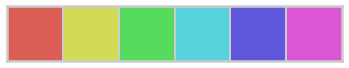

In [472]:
import pandas as pd
import geopandas as gpd
import altair as alt
import folium
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import numpy as np
import openpyxl

# setting seaborn figure aesthetics
sns.set(context='poster', style='whitegrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# set colours 
palette = sns.color_palette('hls')
sns.set_palette(palette)
sns.palplot(palette)

# setting pandas to show all rows and columns when acessing dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print ('Pandas version:',pd.__version__)

* has implementation of new immigration policy impacted the number of migrants coming into the country?
* what are the largest migrant groups?
* how have world events impacted the migrant demographics?
* what is the socio-economic status of immigrants?

***
## 1. Data Aquisition & Cleaning
***
### 1.1 Immigration by Country

#### Import

In [473]:
# import 'iimmigration by country' dataset
immigration = pd.read_excel('Canada.xlsx', engine='openpyxl')
# immigration

#### Immigration by Country

In [474]:
# get rid of top rows
immigration = immigration.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# rename columns to first row
immigration.columns = immigration.iloc[0]

# drop first row
immigration.drop(index=19, inplace = True, axis=0)

# drop unnecessary columns and rename columns
immigration.drop(columns=['Type', 'Coverage','AREA','REG','DEV'], inplace=True)

# get rid of NaN columns
immigration.dropna(axis=1,thresh=10, inplace=True)

immigration.columns = ['Country','Continent','Region','Development',
                       '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                       '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                       '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                       '2010','2011','2012','2013']

print('Dataframe has {} rows and {} columns'.format(immigration.shape[0], immigration.shape[1]))

Dataframe has 1015 rows and 38 columns


In [475]:
#re-index dataframe
immigration.reset_index(drop=True, inplace=True)

In [476]:
immigration.head()

,Country,Continent,Region,Development,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


#### Total Immigration per Year

In [477]:
# get the total immigration for each year
totals = pd.DataFrame(immigration.iloc[196])

# make index into column
totals = totals.reset_index(level=0, inplace=False)

# drop unneeded rows in the beginning
totals = totals.drop([0,1,2,3])
totals.reset_index(drop=True, inplace=True)

# rename columns
totals.columns = ['Year','Immigration']

# change data type
totals['Year'] = totals['Year'].astype('datetime64[ns]')
totals['Immigration'] = totals['Immigration'].astype('int64')

In [478]:
totals.head()

,Year,Immigration
0,1980-01-01,143137
1,1981-01-01,128641
2,1982-01-01,121175
3,1983-01-01,89185
4,1984-01-01,88272


***
### 1.2 Immigration by Region & Continent
#### Import and Clean

In [479]:
# import 'immigration by region' dataset
df_region = pd.read_excel('Regions by Citizenship.xlsx', engine='openpyxl')

# drop stylised header
df_region = df_region.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# rename columns to first row
df_region.columns = df_region.iloc[0]

# drop first row now that we've gottent the column names from it
df_region = df_region.drop([19])

# drop 'type' and 'coverage' columns
df_region.drop(columns=['Type', 'Coverage'], inplace=True)

# get rid of NaN columns
df_region.dropna(axis=1,thresh=10, inplace=True)

# get rid of NaN rows
df_region.dropna(axis=0, thresh=10, inplace=True)

# rename columns
df_region.columns = ['Continent','Region','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                     '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']

# drop "northern america" since there is no data
df_region = df_region.drop([20])

# reindex
df_region.reset_index(drop=True, inplace=True)

#### Immigration by Continent

In [480]:
# find out the names of continents present
print(df_region.Continent.unique())

['Africa' 'Africa Total' 'Asia' 'Asia Total' 'Europe' 'Europe Total'
 'Latin America and the Caribbean' 'Latin America and the Caribbean Total'
 'Northern America' 'Oceania' 'Oceania Total' 'Unknown']


In [481]:
# create new DF with only the continents
continents = ['Africa Total','Asia Total' , 'Europe Total','Latin America and the Caribbean Total','Northern America', 'Oceania Total','Unknown']

df_continents =  df_region[df_region['Continent'].isin(continents)]

# drop region column
df_continents.drop(columns=['Region'], inplace=True)

# transpose the dataframe for time series
df_continents = df_continents.T

# make index into column
df_continents = df_continents.reset_index(level=0, inplace=False)

# rename columns to first row
df_continents.columns = df_continents.iloc[0]

# drop first row
df_continents.drop(index=0, inplace = True, axis=0)

# reindex
df_continents.reset_index(drop=True, inplace=True)

# correct column name from "continent" to "year"
df_continents.columns = ['Year','Africa','Asia','Europe','Latin America and the Carribbean','North America','Oceania','Unknown']

# change data types
df_continents['Year'] = df_continents['Year'].astype('datetime64[ns]')
df_continents['Africa'] = df_continents['Africa'].astype('int64')
df_continents['Asia'] = df_continents['Asia'].astype('int64')
df_continents['Europe'] = df_continents['Europe'].astype('int64')
df_continents['Latin America and the Carribbean'] = df_continents['Latin America and the Carribbean'].astype('int64')
df_continents['North America'] = df_continents['North America'].astype('int64')
df_continents['Oceania'] = df_continents['Oceania'].astype('int64')
df_continents['Unknown'] = df_continents['Unknown'].astype('int64')

/Users/Ayliah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Immigration by Region

In [482]:
print(df_region.Region.unique())

['Eastern Africa' 'Middle Africa' 'Northern Africa' 'Southern Africa'
 'Western Africa' nan 'Central Asia' 'Eastern Asia' 'South-Eastern Asia'
 'Southern Asia' 'Western Asia' 'Eastern Europe' 'Northern Europe'
 'Southern Europe' 'Western Europe' 'Caribbean' 'Central America'
 'South America' 'Northern America' 'Australia and New Zealand'
 'Melanesia' 'Micronesia' 'Polynesia' 'Unknown']


In [483]:
regions = ['Eastern Africa','Middle Africa','Northern Africa','Southern Africa', 'Western Africa', 'Central Asia', 'Eastern Asia', 'South-Eastern Asia', 'Southern Asia', 'Western Asia',
           'Eastern Europe','Northern Europe', 'Southern Europe', 'Western Europe', 'Caribbean', 'Central America', 'South America', 'Northern America', 'Australia and New Zealand', 'Melanesia',
           'Micronesia','Polynesia']

df_regions =  df_region[df_region['Region'].isin(regions)]

# transpose the dataframe for time series
df_regions = df_regions.T

# make index into column
df_regions = df_regions.reset_index(level=0, inplace=False)

# rename columns to second row
df_regions.columns = df_regions.iloc[1]

# drop first row and second
df_regions.drop(index=0, inplace = True, axis=0)
df_regions.drop(index=1, inplace = True, axis=0)

# reindex
df_regions.reset_index(drop=True, inplace=True)

# fix column names
df_regions.columns = ['Year','Eastern Africa','Middle Africa','Northern Africa','Southern Africa', 'Western Africa', 'Central Asia', 'Eastern Asia', 'South-Eastern Asia', 'Southern Asia', 'Western Asia',
           'Eastern Europe','Northern Europe', 'Southern Europe', 'Western Europe', 'Caribbean', 'Central America', 'South America', 'Northern America', 'Australia and New Zealand', 'Melanesia',
           'Micronesia','Polynesia']
# get rid of '••' in some columns
df_regions = df_regions.mask(df_regions=='..', other=0)

# change data types
df_regions['Year'] = df_regions['Year'].astype('datetime64[ns]')

for i in range(1,len(df_regions.columns)):
    df_regions.iloc[:,i] = df_regions.iloc[:,i].astype('int64')

***
## 2. Visualisations
### 2.1 Immigration per Year

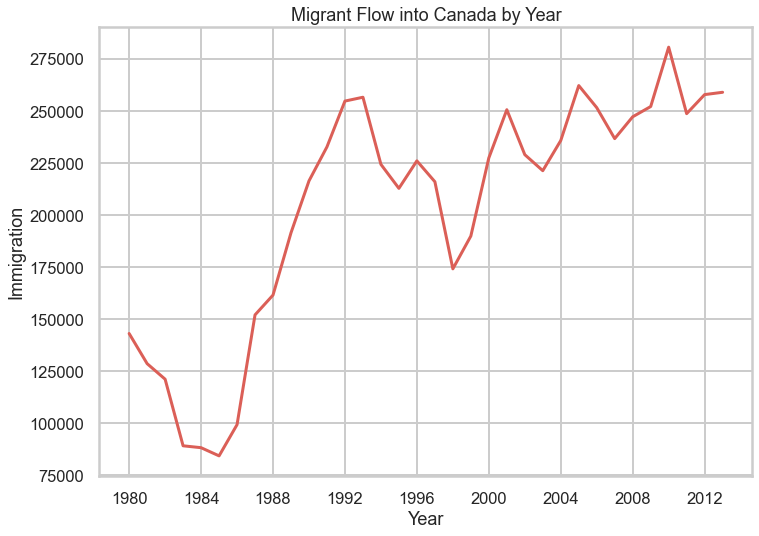

In [487]:
sns.lineplot(data=totals, x='Year', y='Immigration');
plt.title('Migrant Flow into Canada by Year');

### 2.2 Immigration by Continent

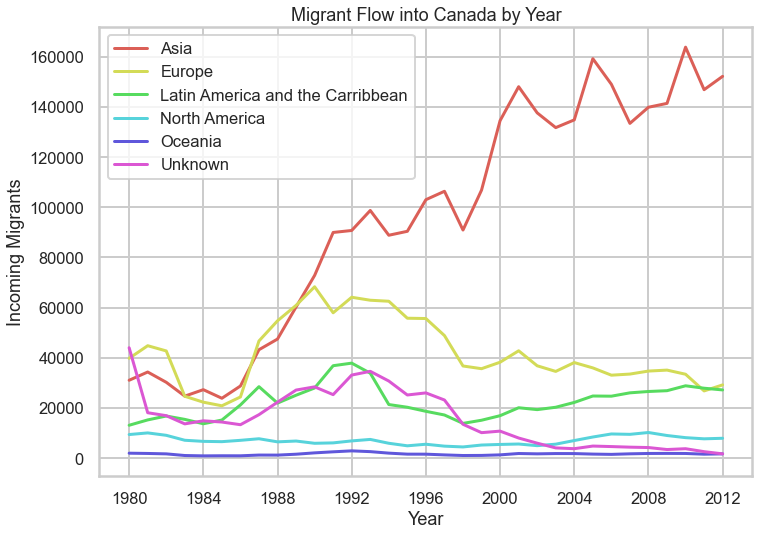

In [488]:
sns.lineplot(data=df_continents, x='Year',y='Asia');
sns.lineplot(data=df_continents, x='Year', y='Europe');
sns.lineplot(data=df_continents, x='Year', y='Latin America and the Carribbean');
sns.lineplot(data=df_continents, x='Year', y='North America');
sns.lineplot(data=df_continents, x='Year', y='Oceania');
sns.lineplot(data=df_continents, x='Year', y='Unknown');
plt.legend(['Asia', 'Europe', 'Latin America and the Carribbean','North America','Oceania','Unknown'])
plt.title('Migrant Flow into Canada by Year');
plt.ylabel('Incoming Migrants');

**NOTES:** the number fo asian immigrants is much higher than other continents, lets look further into which parts of Asia they are coming from

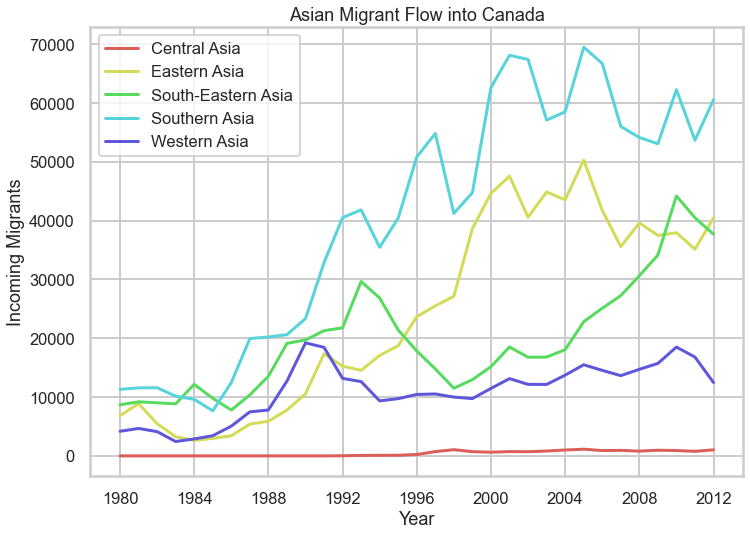

In [498]:
sns.lineplot(data=df_regions, x='Year',y='Central Asia');
sns.lineplot(data=df_regions, x='Year',y='Eastern Asia');
sns.lineplot(data=df_regions, x='Year',y='South-Eastern Asia');
sns.lineplot(data=df_regions, x='Year',y='Southern Asia');
sns.lineplot(data=df_regions, x='Year',y='Western Asia');
plt.title('Asian Migrant Flow into Canada');
plt.ylabel('Incoming Migrants');t
plt.legend(['Central Asia','Eastern Asia','South-Eastern Asia','Southern Asia','Western Asia']);